In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, regularizers
import numpy as np

In [4]:
data = pd.read_csv('boston_housing_prices.csv')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model()

In [6]:
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 601.0203 - mae: 22.4816 - val_loss: 407.3542 - val_mae: 18.5077
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 414.0864 - mae: 18.2486 - val_loss: 255.1015 - val_mae: 14.1359
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 249.5595 - mae: 13.2077 - val_loss: 111.8372 - val_mae: 8.5798
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.5673 - mae: 9.1427 - val_loss: 52.2320 - val_mae: 5.1849
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.1079 - mae: 7.0423 - val_loss: 30.2496 - val_mae: 3.6281
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.4369 - mae: 5.6026 - val_loss: 28.0794 - val_mae: 3.4888
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.9091 - mae: 4.8234 - val_loss: 25.3298 - val_mae: 3.3648
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.3190 - mae: 4.6335 - val_loss: 24.3376 - val_mae: 3.3545
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━

In [7]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {test_mae_score}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4317 - mae: 2.0238 
Mean Absolute Error: 2.1925032138824463


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
Entry 1: Actual price: 23.6, predicted: [28.733786]
Entry 2: Actual price: 32.4, predicted: [34.872017]


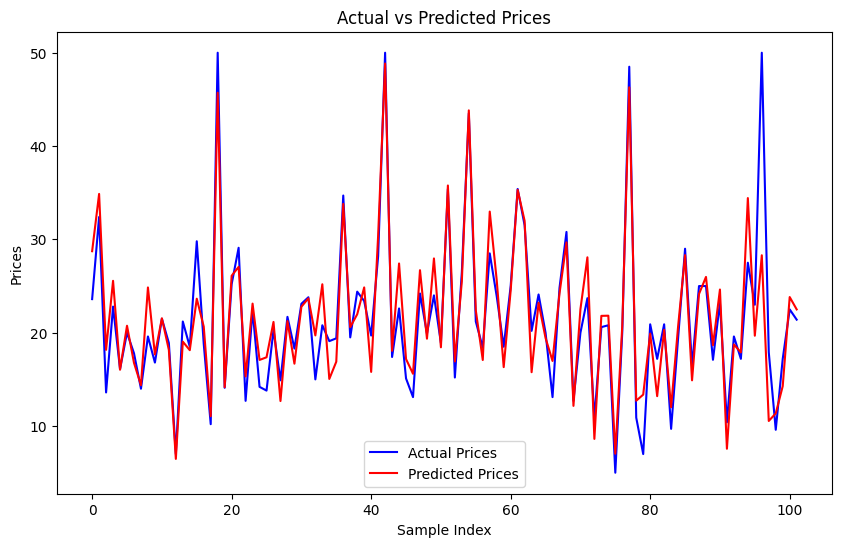

In [11]:
predictions = model.predict(X_test)
actual = np.array(y_test[:2])
predicted = predictions[:2]

for i in range(2):
    print(f"Entry {i+1}: Actual price: {actual[i]}, predicted: {predicted[i]}")

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(predictions, label="Predicted Prices",color="red" )
plt.xlabel("Sample Index")
plt.ylabel("Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()